# Assignment objective

We have data from Raleigh, NC, where we recently deployed a flyer program in order to increase public awareness of the possibility of taking a Pagaya loan.
Your objective is to assess the potency of the flyer program in terms of activation by analyzing production and TU data obtained from the town.


# Basic imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import stats
import seaborn as sns
import os


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

# Data preparation

## Data from TU 

To begin with, upload TUs credit information from the relevant quarter (which is 2018Q3). This data is available in our `s3` path under the name `tu_gen_data2018Q3.parquet`. To get to our `s3` path import `DATA_FILES_PATH` from `pagayapro.paths.data_paths`

In [3]:
from pagayapro.paths.data_paths import DATA_FILES_PATH

read the parquet file from `s3`. Only read the columns ["sequence_num", "credit_score", "listing_term", "int_rate", "loan_amnt", "monthly_pmt", "original_state"]

In [4]:
tu_data= pd.read_parquet(
    os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),
                columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state"])

Output the first 5 rows of tu_data

In [5]:
tu_data.head()

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN


## Activation data 

Your data regarding activation arrives as forms, detailing the loan amount, interest rate offered to the client and whether he or she accepted the offer. These are available on the assignment's `s3` path, which you can import from `pagayapro.path.data_paths` under the name `ASSIGNMENT1_DATA`, in the subdirectory `offers`. 

In [6]:
from pagayapro.paths.data_paths import ASSIGNMENT1_DATA
import glob

Read all files in the subdirectory `offers` of `ASSIGNMENT1_DATA` whose name contains the substring `raleigh`.

In [7]:
raleigh_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*raleigh*")
    )
)

how many forms are there?


In [8]:
print("there are:", len(raleigh_forms) ,"forms")
df = pd.read_csv(raleigh_forms[0])
df.head()

there are: 769 forms


,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,743200d3e4cc1f6f860e121294248d611350f257a7bc83...,ec10245656d9d89186fb4e5890082eea989d5967752ce7...,3000.0,17.69,False,2018-01-01
1,e3e32f85cd78bb5002ccdc037c1818029f716e7a47911e...,3dcd131256c103fccb61c75cd79ca97fa2b5e31c4ab03e...,6899.0,12.56,False,2018-01-01
2,3a72ae7a82244f811b37c48f57469b708207004f011163...,06c005c5de6ba445d4c709b84611ac2b8542cd5d37221b...,3800.0,12.97,False,2018-01-01
3,ce770273c28ddb4f8637ae423b582f0b1617e0fe7a4880...,c49b3fce67673a9f82ed4ccaa9f75e668db48e775514fc...,13000.0,5.06,False,2018-01-01
4,7eac15c5019d5101e6434ac34202cc974b044c808958c3...,107a5b2ba3853f80df245d8644af08b74d27af77f14292...,9250.0,10.34,False,2018-01-01


Read all the form files and create a table which contains only the last offer given to each borrower. Call this dataframe `raleigh_df`.

In [9]:
df_list = [pd.read_csv(file_path,index_col=None,header=0) for file_path in raleigh_forms]

# Concat all data frames and sort by date
raleigh_df = pd.concat(df_list, axis=0, ignore_index=True)

How many rows are there in your table? How many distinct ids?

In [10]:
print("we have ",len(raleigh_df),"rows in our table")

we have  13362 rows in our table


In [11]:
print("Number of unique id's is ",len(raleigh_df['id'].unique()))

Number of unique id's is  8792


How can you explain the duplicate ids? Sample 5 ids with multiple lines and display them.

In [12]:
### The duplicate id's might result from customers getting more then one offer per client lets verify this is the case:
duplicate_id_list = raleigh_df.loc[raleigh_df.id.duplicated()].id.unique()[:5]

duplicate_id_sample_df = raleigh_df.query('id in @duplicate_id_list').sort_values(by='offer_date').sort_values(by='id')
print("We can see that the duplicate id's all reffer to the same sums, and the interest rate is decreasing with the date.\n this suggests they are offers for the same person which negotiated the terms")
duplicate_id_sample_df

We can see that the duplicate id's all reffer to the same sums, and the interest rate is decreasing with the date.
 this suggests they are offers for the same person which negotiated the terms


,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
76,2a86462ab55cbfb84e13ff4bb767b9d33555932b8f9a78...,4b3a8b8ac0ba9d96fb7d276b34767b705cd276278404f9...,4300.0,30.979232,False,2018-01-03
454,2a86462ab55cbfb84e13ff4bb767b9d33555932b8f9a78...,4b3a8b8ac0ba9d96fb7d276b34767b705cd276278404f9...,4300.0,30.610000,False,2018-01-25
144,456af414f6f6342fc568fb1e70a35b107b18afa02ba96c...,d41f948c1890f1b4e359bedf0f02dbfc36e4890258aa84...,32000.0,14.252331,False,2018-01-08
155,456af414f6f6342fc568fb1e70a35b107b18afa02ba96c...,d41f948c1890f1b4e359bedf0f02dbfc36e4890258aa84...,32000.0,13.110000,False,2018-01-09
233,59af0bbecfee268371d46904e1451f5988d3df1ceca43f...,0dcdc2f2593d210521d0f59e6beb7ffb259a363f36c8bc...,7937.0,29.838390,False,2018-01-12
248,59af0bbecfee268371d46904e1451f5988d3df1ceca43f...,0dcdc2f2593d210521d0f59e6beb7ffb259a363f36c8bc...,7937.0,29.780000,False,2018-01-15
162,95e52ddf9e6493de871cde78dabb9cbfe6946f574addaf...,c4ca9a8d6a47c533a45e13ce6fe22d7ad67e2a6d34d4fb...,2769.0,32.621474,False,2018-01-09
298,95e52ddf9e6493de871cde78dabb9cbfe6946f574addaf...,c4ca9a8d6a47c533a45e13ce6fe22d7ad67e2a6d34d4fb...,2769.0,32.260000,False,2018-01-17
87,b260d29c90797440b3e61245b0a504e3646ab09a4b7c70...,abc079e4dc73f38729e4862ba724114031618d4508209b...,5291.0,32.268386,False,2018-01-03
185,b260d29c90797440b3e61245b0a504e3646ab09a4b7c70...,abc079e4dc73f38729e4862ba724114031618d4508209b...,5291.0,32.084070,False,2018-01-10


Drop all lines in the dataframe which contain irrelevant information.

In [13]:
raleigh_df = raleigh_df.sort_values(by='offer_date',ascending=False).drop_duplicates(subset='id', keep='first')

# Verify that the most recent row was kept and all the rest were removed:
duplicate_id_sample_df = raleigh_df.query('id in @duplicate_id_list').sort_values(by='offer_date').sort_values(by='id')
duplicate_id_sample_df

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
454,2a86462ab55cbfb84e13ff4bb767b9d33555932b8f9a78...,4b3a8b8ac0ba9d96fb7d276b34767b705cd276278404f9...,4300.0,30.61,False,2018-01-25
155,456af414f6f6342fc568fb1e70a35b107b18afa02ba96c...,d41f948c1890f1b4e359bedf0f02dbfc36e4890258aa84...,32000.0,13.11,False,2018-01-09
248,59af0bbecfee268371d46904e1451f5988d3df1ceca43f...,0dcdc2f2593d210521d0f59e6beb7ffb259a363f36c8bc...,7937.0,29.78,False,2018-01-15
298,95e52ddf9e6493de871cde78dabb9cbfe6946f574addaf...,c4ca9a8d6a47c533a45e13ce6fe22d7ad67e2a6d34d4fb...,2769.0,32.26,False,2018-01-17
3542,b260d29c90797440b3e61245b0a504e3646ab09a4b7c70...,abc079e4dc73f38729e4862ba724114031618d4508209b...,5291.0,31.84,False,2018-07-31


What is the average interest rate offered to clients? What is the average among clients who accepted the offer?

In [14]:
avarage_int_rate_all_clients = raleigh_df.offered_interest_rate.mean()
avarage_int_rate_accepted_offer = raleigh_df.query('offer_accepted').offered_interest_rate.mean()

print("avarage interest rate of all offeres: ",avarage_int_rate_all_clients)
print("avarage interest rate of all offeres accepted: " ,avarage_int_rate_accepted_offer)

avarage interest rate of all offeres:  15.524284576888082
avarage interest rate of all offeres accepted:  15.307480314960632


What is the percentage of activation in this dataframe?

In [15]:
print("Activation rate in the data frame is: {}%".format(np.round(100*raleigh_df.offer_accepted.mean(),3)))

Activation rate in the data frame is: 8.667%


Enrich your dataframe with additioanl TU features by merging it with the `tu_data` df. Note that the two dataframe share the `id` and `sequence_num` features.

In [16]:
if(len(raleigh_df.columns) < 7):
    raleigh_df = raleigh_df.merge(tu_data,on=['id','sequence_num'])

raleigh_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
0,be462838a489d80c3dfa088cda7d04d650f5afc9fac0fa...,da4c2882d9002a68ae96962a6a9f0d18fd2df86f7e71e0...,8000.0,10.22,False,2020-12-10,764,36.0,10.22,8000.0,259.0,NC
1,cefa90420bde7d95ce54ad83fbb17f8841a7390c505bea...,85a6a68c1fdd0081220bf891a51af4209bbfe285af161b...,4075.0,30.89,False,2020-12-10,555,36.0,30.89,4075.0,175.0,NC
2,69b282258fdc0b55336a5c88e94dd0c0a4fdac7a6a448b...,8b1ed3ba66907feb4c208578846eddf03fc09c8a605048...,15000.0,15.27,False,2020-12-10,638,60.0,15.27,15000.0,359.0,NC
3,1cd63a26af1b927957c7743ba557f1895a90ec3b891cfc...,28851f4c2e331d785f0f37ae78cf6a574dd8076375dbe0...,5000.0,11.55,True,2020-12-10,721,36.0,11.55,5000.0,165.0,NC
4,e96d59f7aa7e2d6ad5ebccba21085a772d1bb8a0321d2f...,466be4dfe5d6734fdc2fe9d95b91507e3269f86771c5e4...,20000.0,11.41,True,2020-12-10,751,60.0,11.41,20000.0,439.0,NC


What is the average credit score of the clients? What is the average among clients who accepted the offer?

In [17]:
avarage_credit_score_all_clients = raleigh_df.credit_score.mean()
avarage_credit_score_accepted_offer = raleigh_df.query('offer_accepted').credit_score.mean()
print(avarage_credit_score_all_clients)
print(avarage_credit_score_accepted_offer)

689.821542311192
702.5446194225722


# Validations

Before we embark on a statistical test, let's do some validations to make sure that the Raleig sample is not somehow distinct from the general population. Our random sample from the general population is the TU data.

Create a histogram to describe the distribution of requested loan amounts in Raleigh and in the general population. Do the distributions look similar? (A good rule-of-thumb for the number of bins to use is the square-root of the number of unique value.)

In [18]:
# We noticed that setting the number of diffs to 3 instead of 1.5 brings more descriptive charts.
def remove_out_liars(series):
    q_25 =  series.quantile(q=0.25, interpolation='linear')
    q_75 =  series.quantile(q=0.75, interpolation='linear')
    diff = q_75 - q_25
    upper_lim = q_75 + (3 *diff)
    lower_lim = q_25 - (3 *diff)
    precentage_of_out_liars = ((series.values > upper_lim) | (series.values < lower_lim)).sum() / series.size
    return lower_lim,upper_lim, precentage_of_out_liars

In [19]:
df_list = [tu_data,raleigh_df]
df_title_list = ['TU','raleigh']

In [20]:
def plot_density_histogram(data_list,x_lable='x',y_lable='y',titles=[],func_flag='hist'):
    
    
    plt.figure(figsize=(20,5))
    for i, data in enumerate(data_list):
        plt.subplot(1, 3, i+1)
        bins = int(np.sqrt(len(data.unique())))

        if func_flag == 'hist':
            plt.hist(data, bins=bins,
                     density=True,
                     alpha=0.7, color='firebrick', edgecolor='k', label='noisy')
        else:
            sns.distplot(data,bins=bins)
            
        plt.xlabel(x_lable)
        plt.ylabel(y_lable)
        lower_lim,upper_lim, precentage_of_out_liars = remove_out_liars(data)
        plt.xlim(lower_lim,upper_lim)
        plt.grid(True)

        if(len(titles) > i):
            plt.title(titles[i] + "  (Precent of outliars removed is: {}%)".format(str(np.round(100*precentage_of_out_liars,2))))
        plt.tight_layout();

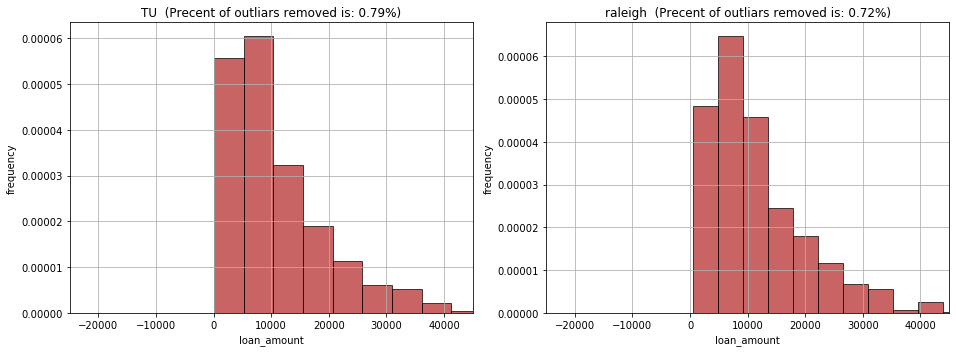

In [21]:
plot_density_histogram([df.loan_amnt for df in  df_list],'loan_amount','frequency',df_title_list)

Describe the loan amount distribution using `sns.distplot` in the Raleigh dataframe and in TU.

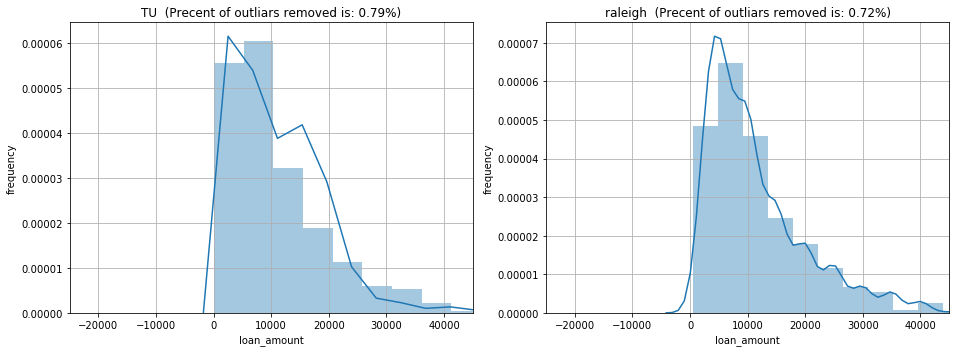

In [22]:
plot_density_histogram([df.loan_amnt for df in  df_list],'loan_amount','frequency',df_title_list,func_flag='seaborn')

We also want to verify that the offered interest rate in Raleigh seem similar to those in the general population. 
Create a histogram to describe the distribution of offered interest rates in Raleigh and interest rates in the general population. Do the distributions look similar?

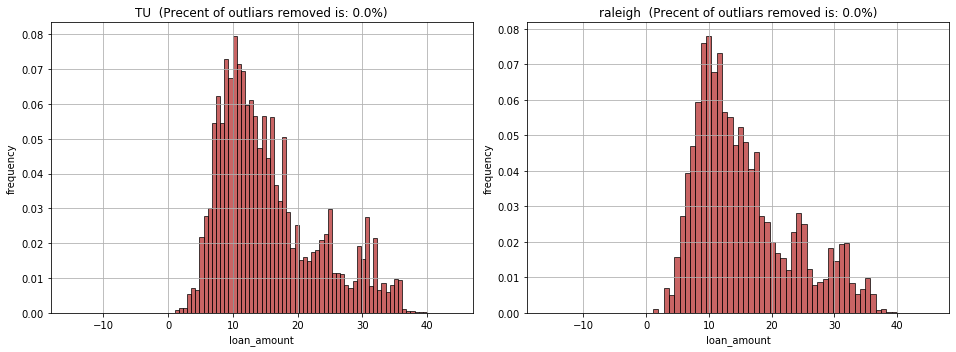

In [23]:
plot_density_histogram([df.int_rate for df in  df_list],'loan_amount','frequency',df_title_list)

Describe the interest rate distribution using `sns.distplot` in the Raleigh dataframe and in TU.

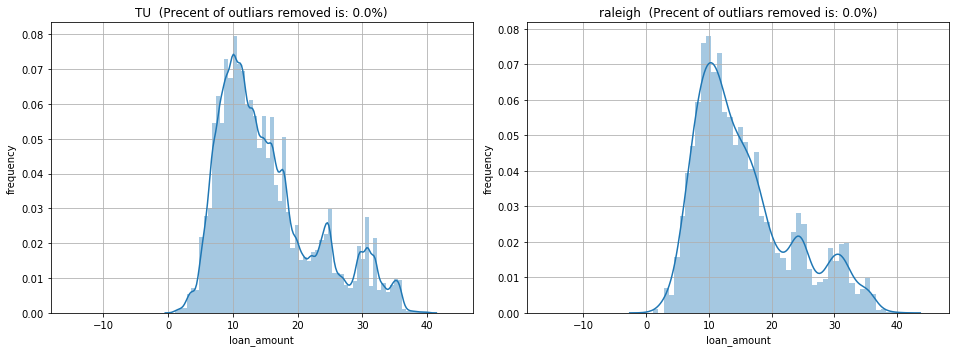

In [24]:
plot_density_histogram([df.int_rate for df in  df_list],'loan_amount','frequency',df_title_list,func_flag='seaborn')

Additionally, we want to make sure the credit scores are not visibly different in Raleigh from the general population, as this might mean that the data we obtained from the town might not be representative of the general popuation.

Create a histogram to describe the distribution of credit scores in the Raleigh sample and in the general population. Do the distributions look similar? How many bins did you use?

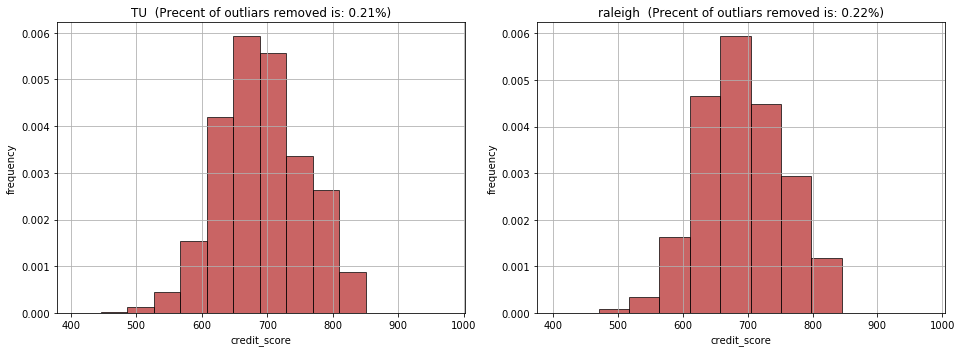

In [25]:
plot_density_histogram([df.credit_score for df in  df_list],'credit_score','frequency',df_title_list)

Describe the credit score distribution using `sns.distplot`  in the Raleigh dataframe and in TU.

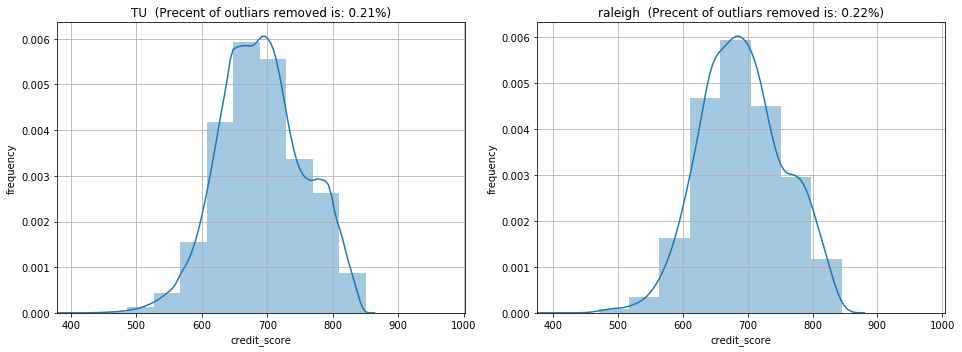

In [26]:
plot_density_histogram([df.credit_score for df in  df_list],'credit_score','frequency',df_title_list,func_flag='seaborn')

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

In [27]:
def get_loan_term_ratio(df):
    loans_36_months_term = len(df.loc[df.listing_term == 36])
    loans_60_months_term = len(df.loc[df.listing_term == 60])
    return loans_60_months_term /loans_36_months_term

Text(0.5, 1.0, 'All population')

<Figure size 720x360 with 0 Axes>

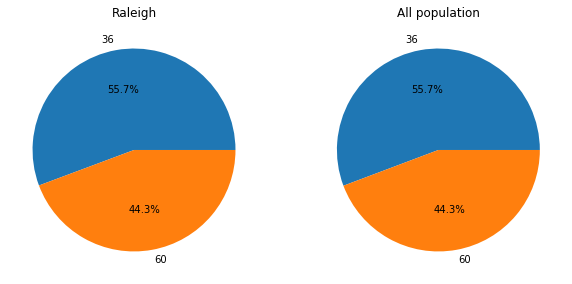

In [124]:
# num_of_rows = len(tu_data)
plt.figure(figsize=(10,5))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(raleigh_df['listing_term'].value_counts(),labels = ['36','60'],autopct = '%1.1f%%');
ax1.set_title('Raleigh')
ax2.pie(tu_data['listing_term'].value_counts(),labels = ['36','60'],autopct = '%1.1f%%');
ax2.set_title('All population')

# CLT in action

One more thing before we start the test. Our goal is to check whether, for which we'll run some statistical test (you probably already know which) which checks if something belongs to a noraml distribution with some mean and some variance. But... is activation normally distributed in the Raliegh sample? 

In [30]:
#+2 points if you answer without plotting
#TODO - verify this is whar they meant.
print("Activation is not notmally distrebuted since it is a binomial variable.\nNever the less according to the CLT theorem the mean of means of large enough randomly selected smaples might have a normal distribution")

Activation is not notmally distrebuted since it is a binomial variable.
Never the less according to the CLT theorem the mean of means of large enough randomly selected smaples might have a normal distribution


The reason why we can assume normality is because we're checking averages of samples and we're relying on the Central Limit Theorem. We won't prove the theorem, but let's test it for a bit. 

Write a function which takes a pandas series S and a natural number n and creates a series of means of samples (with replacement) of n entries from S. Decide for yourself on the length of the output series. You can also use a different data structure if you find it more suitable as the output.

In [31]:
def create_mean_samples(series,n,num_of_means=2500):
    max_ind = len(series)-1
    return pd.Series([series[np.random.randint(0,max_ind,n)].mean() for i in range(num_of_means)])

Optionally- also create a function which, given the same input as above, plots a histogram of the series of means, and also indicates the mean of this series.

mean of the means of 10000 randomly sampled input groups is: 0.08661695999999999


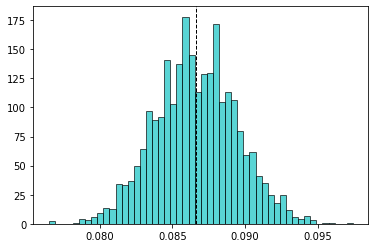

In [32]:
def create_mean_samples_and_plot(series,n,num_of_means=2500):
    max_ind = len(series)-1
    num_of_bins = int(np.sqrt(num_of_means))
    result = pd.Series([series[np.random.randint(0,max_ind,n)].mean() for i in range(num_of_means)])
    print("mean of the means of {} randomly sampled input groups is: {}".format(n,result.mean()))
    plt.hist(result, bins=num_of_bins, color='c', edgecolor='k', alpha=0.65)
    plt.axvline(result.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.show()

create_mean_samples_and_plot(raleigh_df.offer_accepted,10000)                

Generate plots of the series of means of activation in Raleigh and in TU for n = 1, 2, 5, 10, 100, 1000 and 1e6, and indicate their means. Does the distribution approach a normal distribution as $n\to\infty$ in your opinion?

mean of the means of 1 randomly sampled input groups is: 0.0776


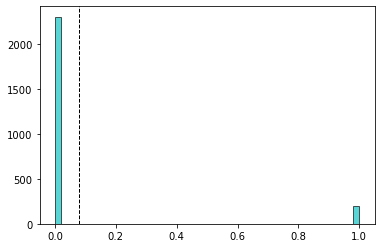

mean of the means of 2 randomly sampled input groups is: 0.0844


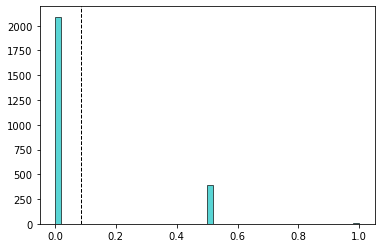

mean of the means of 5 randomly sampled input groups is: 0.08528000000000001


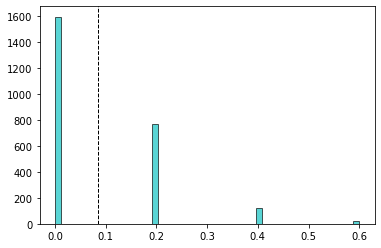

mean of the means of 10 randomly sampled input groups is: 0.08664000000000001


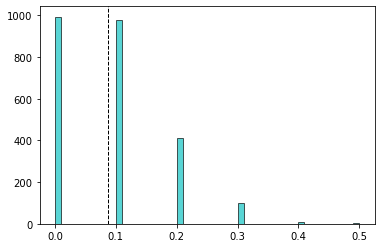

mean of the means of 100 randomly sampled input groups is: 0.08612


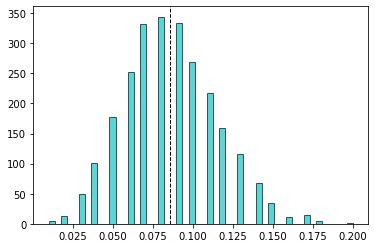

mean of the means of 1000 randomly sampled input groups is: 0.0863704


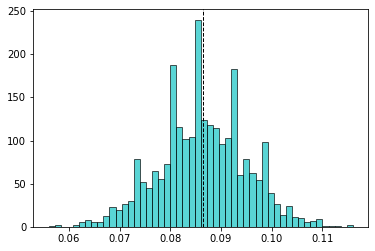

mean of the means of 1000000 randomly sampled input groups is: 0.0866820864


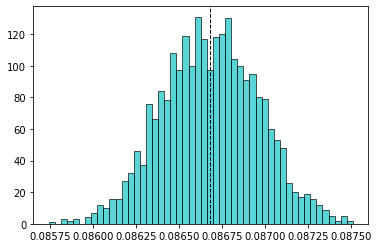

In [33]:
for n in [1, 2, 5, 10, 100, 1000,1000000]:
    create_mean_samples_and_plot(raleigh_df.offer_accepted,n)

In [34]:
# Notion our opinion the distribution approach a normal distribution as $n\to\infty$ since we see that the std approaches the normalized std for a binomial distribution

Now that your fuction is ready, it's time to make it part of our infrastucture:
* Inside the `pagayapro` repo, create a branch called `feature/{your_user_name}/clt_tester/`.
* Create a file called `clt.py` inside `~/pagayapro/users/{user_name}/assignment1/` 
* Copy the two finctions you just created into the file.
* Push your file to `main`, open a PR and ask your mentor to review it. Once approved, rebase and merge.

In [35]:
# Done

# Statistical test 

As mentioned in the Notion doc, the activation in Raleigh before deployment was measured at 6.85%. In this section, you will run a test to check whether the activation in Raleigh is indeed different following the flyer program. 

In [36]:
from statsmodels.stats.proportion import proportions_ztest

Run a statistical test to check whether the current activation rate in Raleigh is different from 6,85%:
1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error? What is the power of your test?
3. Is the sample mean significantly different from the past value of 6.85?
4. Interpret your results. Can you declare the program as successful in increasing activation (what is the probability of wrongfully declaring it successful)?
5. Are there any other possible explanations for the change in activation that you observed? Discuss the possible drawbacks of our current test.

Use `proportions_ztestz` from `statsmodels.stats.proportion` in order to perform the test. Are your results significant?

Hypotheses:
* $H_0$ = Activation after the flyer operation is the same as before. i.e a brenuly distribution with $p=0.0685$
* $H_1$ = Activation after the flyer operation is a brenuly distribution with with $p != 0.0685$

* Our type I error probability  that we will reject a valid null hypotheses is 1-confidence = 1-0.95 = 0.05

In [37]:
# Try and reject H_0
sample_success = raleigh_df.offer_accepted.sum()
sample_size = raleigh_df.offer_accepted.count()

null_hypothesis = 0.0685
stat, p_value = stats.proportion.proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='two-sided')

In [38]:
print("The mean is significantly different from the past value with a p_value of:",p_value)

The mean is significantly different from the past value with a p_value of: 1.4005491742963572e-09


In [39]:
print("We can infer with high probability (close to 1) that there is a corrolation between the program and the increase in activation rate. We can not infer causation from the statistical model.")

We can infer with high probability (close to 1) that there is a corrolation between the program and the increase in activation rate. We can not infer causation from the statistical model.


Do you see any possible problems in your methodology? What other factors can explain the change in activation, if such a change exists?

#### The problem with the metodology:
* We did not rule out some other possible factors that exist in the data, for instance if there was a decrease in offered interest rate at the same time. 
* We did not compare the results to other cities, if the result was similar in other locations that would weeken the assumption that the flyer operation caused the increase in activation rate. 

# A/b test

In order to isolate temporal and environmental effects on activation, we'll run an a/b test, comparing the activation rate in Raleigh to that of Lubbock, TX, another town in which Pagaya operates without a flyer program. 

The activation forms for Lubbock also appear in the `offers` subdirectory of the `ASSIGNMENT1_DATA` folder. Read all files from this folder whose name contains the substring 'lubbock', and create a dataframe of final offers called `lubbock_df`, drop unnecessary rows from it, and enrich it with TU features.

In [40]:
lubbock_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*lubbock*")
    )
)

In [41]:
df_list = [pd.read_csv(file_path,index_col=None,header=0) for file_path in lubbock_forms]

# Concat all data frames and sort by date
lubbock_df = pd.concat(df_list, axis=0, ignore_index=True)
lubbock_df = lubbock_df.sort_values(by='offer_date',ascending=False).drop_duplicates(subset='id', keep='first')
if(len(lubbock_df.columns) < 7):
    lubbock_df = lubbock_df.merge(tu_data,on=['id','sequence_num'])
lubbock_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
0,3742bc381ddc6989be5463830f879557a13471e1b8618e...,b1276d6387f519d03d3cce044daaeeb45b568e49acf0a2...,2000.0,14.66,False,2020-12-10,795,36.0,14.66,2000.0,69.0,TX
1,b463a3bb87d8567327a3c84ecaee275b6a74ee244771d9...,35a33e4015f86ec0f66f4af0e1260654be78621befbc7d...,13843.0,15.09,True,2020-12-10,688,60.0,15.09,13843.0,330.0,TX
2,f06539526b5a630e09be216a6bccf9c2e56e0637a005ae...,8c90e11b90d6e158b0fa77816dfc370a71a6637eff749d...,10000.0,16.34,False,2020-12-10,696,60.0,16.34,10000.0,245.0,TX
3,d1607acf30687e938755525e87dc1b4a9597821a4f4eec...,03beebcc3cac134f1788d898d8bb7e8496c3d16982049b...,15000.0,18.50,False,2020-12-10,631,60.0,18.50,15000.0,385.0,TX
4,a66e1960316b31bb57e6d473ae372115b0399961fcf062...,6e61c47f603d22a38ed0fa63c83cef294d825c3fee9b58...,15000.0,8.99,False,2020-12-10,764,36.0,8.99,15000.0,477.0,TX


What is the average interest rate in Lubbock? What is it among accepting borrowers?

In [42]:
avarage_int_rate_all_clients = lubbock_df.offered_interest_rate.mean()
avarage_int_rate_accepted_offer = lubbock_df.query('offer_accepted').offered_interest_rate.mean()

print("avarage interest rate of all offeres: ",avarage_int_rate_all_clients)
print("avarage interest rate of all offeres accepted: " ,avarage_int_rate_accepted_offer)

avarage interest rate of all offeres:  15.505397526501767
avarage interest rate of all offeres accepted:  13.553895131086142


What is the average credit score in Lubbock? What is it among accepting borrowers?

In [43]:
avarage_credit_score_all_clients = lubbock_df.credit_score.mean()
avarage_credit_score_accepted_offer = lubbock_df.query('offer_accepted').credit_score.mean()

print("avarage credit score of all offeres: ",avarage_credit_score_all_clients)
print("avarage credit score of all offeres accepted: " ,avarage_credit_score_accepted_offer)

avarage credit score of all offeres:  690.0338339222615
avarage credit score of all offeres accepted:  730.5337078651686


What is the rate of activation in Lubbock?

In [44]:
activation_rate_all_clients = lubbock_df.offer_accepted.mean()
print("activation rate in lubbock is : ",activation_rate_all_clients)

activation rate in lubbock is :  0.04717314487632509


## Caution about a/b test 

Note that this is not a classical a/b test. Usually, in such a test, one creates two random subgroups from the general population and applies a manipulation to one of them in order to see if the manipulation had an effect. However, in this case, it is very complicated to isolate a random subgroup from any population and deploy the flyer program only on it.
Thus, due to production limitation, we have to make do with what we got.

In order to justify the use of an a/b test for this situation, we should at least verify that the borrower population in Lubbock and Raleigh seem as though they were randomly selected from the general population. We have actually already checked it for Raleigh above. Add TU features to the loan amount, interest rate, credit score and term comparisons and see if there any major differences between the three populations (Lubbock, Raleigh and TU).

In [45]:
df_list = [tu_data,raleigh_df,lubbock_df]
df_title_list = ['TU','raleigh','lubbock']

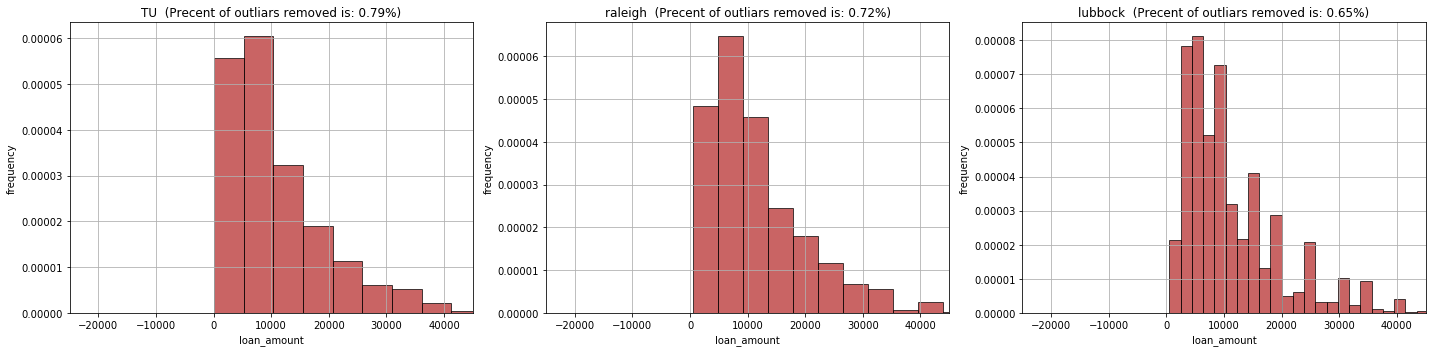

In [46]:
plot_density_histogram([df.loan_amnt for df in  df_list],'loan_amount','frequency',df_title_list)

Describe the loan amount distribution using `sns.distplot` in the Raleigh dataframe and in TU.

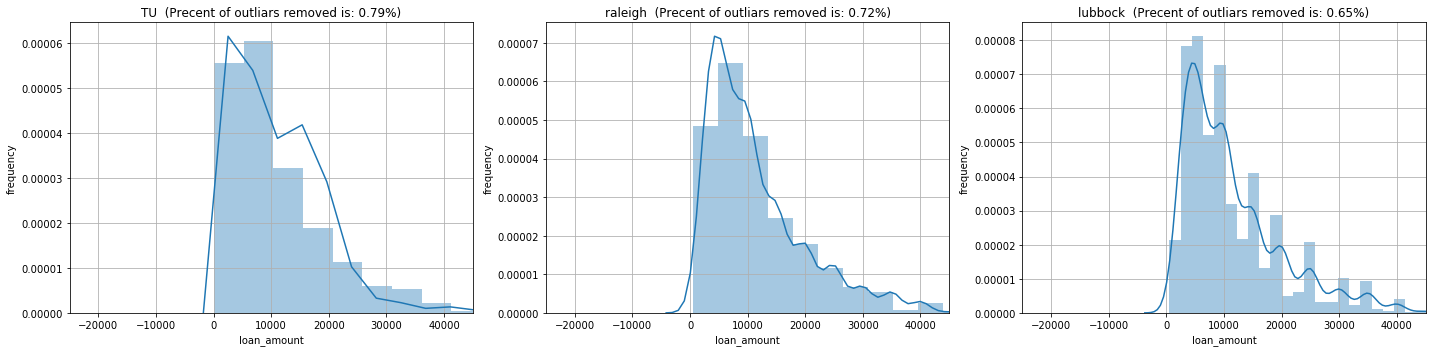

In [47]:
plot_density_histogram([df.loan_amnt for df in  df_list],'loan_amount','frequency',df_title_list,func_flag='seaborn')

Compare interest rate histograms:

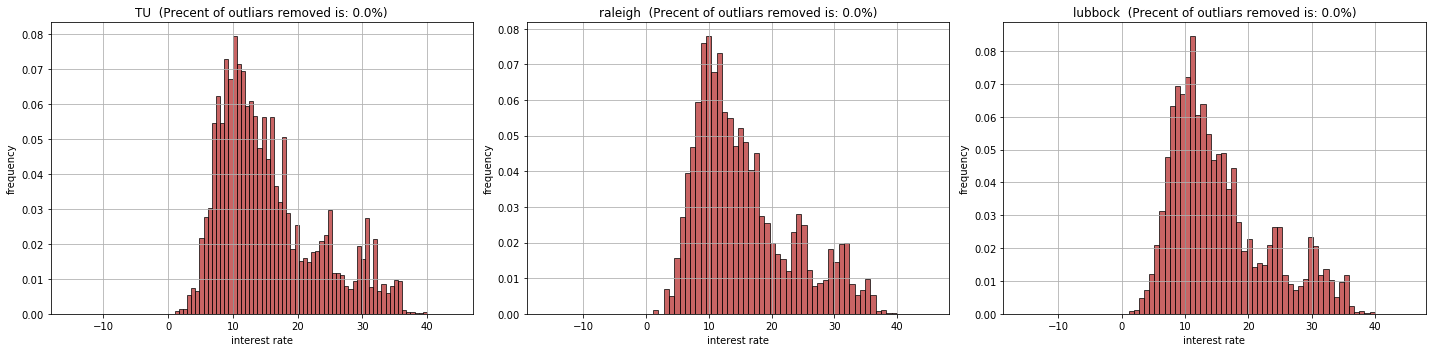

In [48]:
plot_density_histogram([df.int_rate for df in  df_list],'interest rate','frequency',df_title_list)

Compare interest rate distribution using `sns.distplot`:

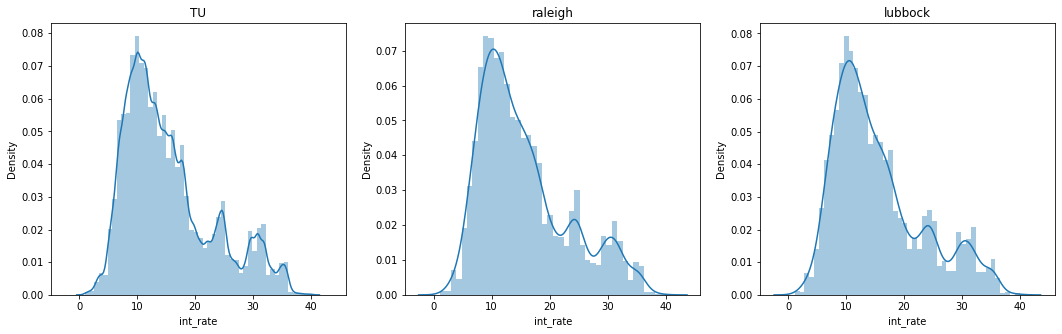

In [49]:
f, axes = plt.subplots(1, 3, figsize=(18 ,5), sharex=True)
for i,df in enumerate(df_list):
    sns.distplot(df.int_rate,ax=axes[i]).set(title=df_title_list[i])

Create a histogram to describe the distribution of credit scores for all 3 data sets

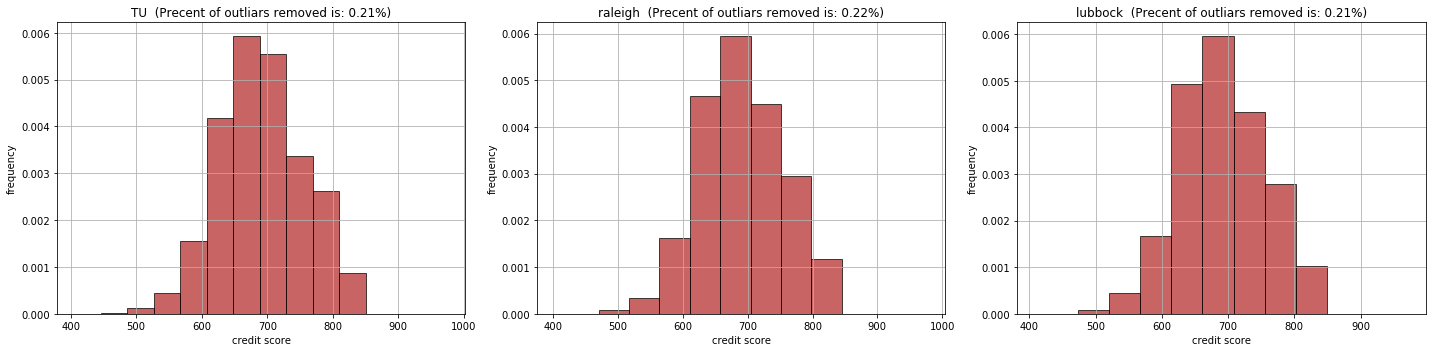

In [50]:
plot_density_histogram([df.credit_score for df in  df_list],'credit score','frequency',df_title_list)

Describe the credit score distribution using `sns.distplot` for the 3 data sets

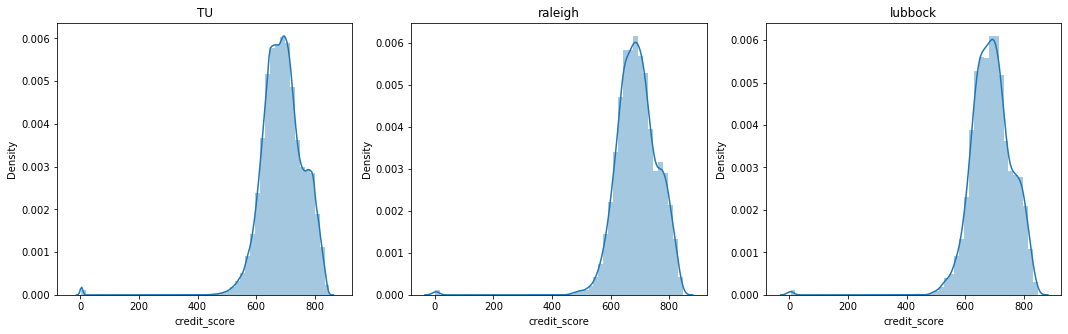

In [51]:
f, axes = plt.subplots(1, 3, figsize=(18 ,5), sharex=True)
for i,df in enumerate(df_list):
    sns.distplot(df.credit_score,ax=axes[i]).set(title=df_title_list[i])

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

In [52]:
def get_loan_term_ratio(df):
    loans_36_months_term = len(df.loc[df.listing_term == 36])
    loans_60_months_term = len(df.loc[df.listing_term == 60])
    return loans_60_months_term /loans_36_months_term

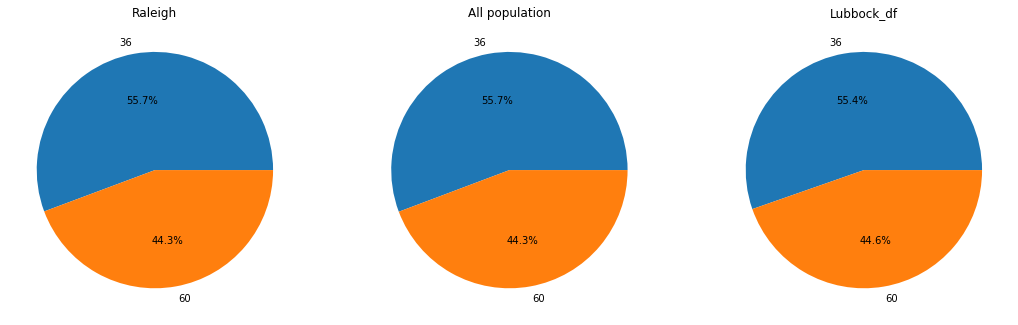

The ratio between 60 months loans to 36 months loans in entire population is:  0.7943541990252757


In [118]:
# num_of_rows = len(tu_data)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,12))
ax1.pie(raleigh_df['listing_term'].value_counts(),labels = ['36','60'],autopct = '%1.1f%%');
ax1.set_title("Raleigh")
ax2.pie(tu_data['listing_term'].value_counts(),labels = ['36','60'],autopct = '%1.1f%%');
ax2.set_title("All population")
ax3.pie(lubbock_df['listing_term'].value_counts(),labels = ['36','60'],autopct = '%1.1f%%');
ax3.set_title("Lubbock_df")
plt.show();
print("The ratio between 60 months loans to 36 months loans in entire population is: ",(get_loan_term_ratio(tu_data)))

## Performing the test

Use the function you created in the file `clt.py` to plot the series of means of activation in Raleigh and Lubbock for samples of size n= 1, 10, 1000 and 1e6, and compare the means of the two histograms. To they seem to converge to the same value?

mean of the means of 1 randomly sampled input groups is: 0.0508


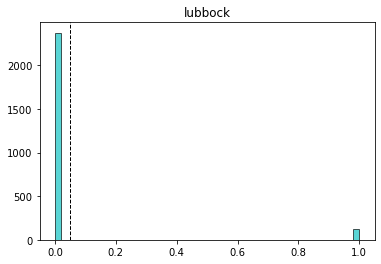

mean of the means of 1 randomly sampled input groups is: 0.0852


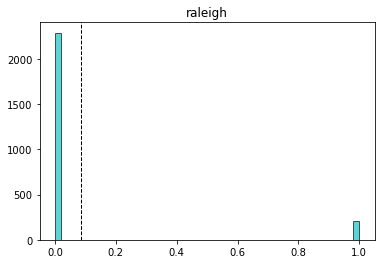

mean of the means of 10 randomly sampled input groups is: 0.0482


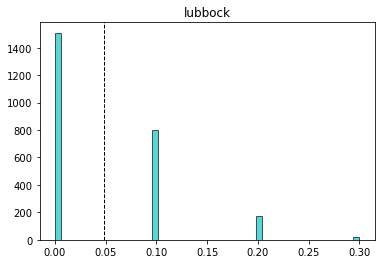

mean of the means of 10 randomly sampled input groups is: 0.08567999999999999


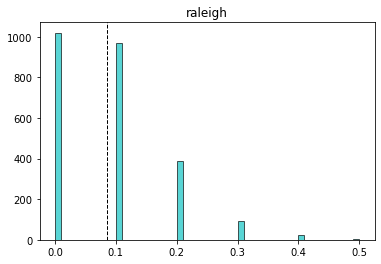

mean of the means of 1000 randomly sampled input groups is: 0.047060399999999995


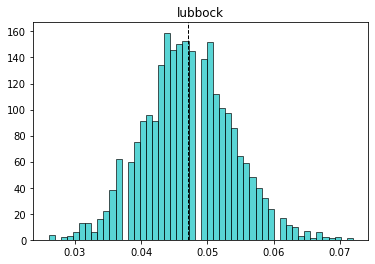

mean of the means of 1000 randomly sampled input groups is: 0.0867372


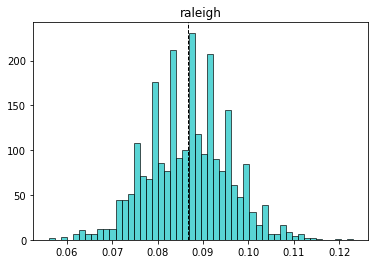

mean of the means of 1000000 randomly sampled input groups is: 0.0471776516


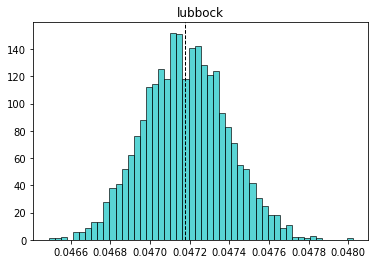

mean of the means of 1000000 randomly sampled input groups is: 0.0866824176


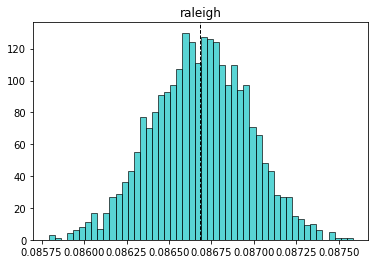

In [56]:
for n in [1, 10,1000,1000000]:
    plt.title("lubbock")
    create_mean_samples_and_plot(lubbock_df.offer_accepted,n)
    plt.title("raleigh")
    create_mean_samples_and_plot(raleigh_df.offer_accepted,n)

Apply a statistical test to see whether the activation rate in Raleigh, NC is significantly larger than Lubbock, TX. Clearly state and validate your test's assumption. 

1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error?
3. Are the two samples significantly different? 
4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?

Use the `proportions_ztestz` function from `statsmodels.stats.proportion` to perform a comparison between the activation probability in Lubbock and in Raleigh. 

In [58]:
# Try and reject H_0
sample_success_raleigh = raleigh_df.offer_accepted.sum()
sample_success_lubbock = lubbock_df.offer_accepted.sum()
sample_size_raleigh = raleigh_df.offer_accepted.count()
sample_size_lubbock = lubbock_df.offer_accepted.count()

stat, p_value = stats.proportion.proportions_ztest(count=[sample_success_raleigh,sample_success_lubbock], nobs=[sample_size_raleigh,sample_size_lubbock], alternative='larger')

In [59]:
print("We got a p_value of,", p_value , " thus we can reject the null hypotheses")

We got a p_value of, 5.475858880145861e-30  thus we can reject the null hypotheses


Interprest your results; do you observe a significant change in activation in Raleigh? What is the probability of wrongfully declaring the program successful?

# Testing for activation in sub-populations

Now that you applied the a/b test to the Lubbock and Raleigh datasets, it is now required that you make a similar comparison on different subsets of the data within various credit score and loan amount bins. To do so, let us first decide on how to segment our data.

Divide your datasets as above and add two columns to your data which indicate the (credit_score, loan_amnt) of the bin.

In [60]:
tu_data['credit_score_group'] = pd.qcut(tu_data['credit_score'],q=10,labels=False)
tu_data['loan_amnt_group'] = 0

raleigh_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
0,be462838a489d80c3dfa088cda7d04d650f5afc9fac0fa...,da4c2882d9002a68ae96962a6a9f0d18fd2df86f7e71e0...,8000.0,10.22,False,2020-12-10,764,36.0,10.22,8000.0,259.0,NC
1,cefa90420bde7d95ce54ad83fbb17f8841a7390c505bea...,85a6a68c1fdd0081220bf891a51af4209bbfe285af161b...,4075.0,30.89,False,2020-12-10,555,36.0,30.89,4075.0,175.0,NC
2,69b282258fdc0b55336a5c88e94dd0c0a4fdac7a6a448b...,8b1ed3ba66907feb4c208578846eddf03fc09c8a605048...,15000.0,15.27,False,2020-12-10,638,60.0,15.27,15000.0,359.0,NC
3,1cd63a26af1b927957c7743ba557f1895a90ec3b891cfc...,28851f4c2e331d785f0f37ae78cf6a574dd8076375dbe0...,5000.0,11.55,True,2020-12-10,721,36.0,11.55,5000.0,165.0,NC
4,e96d59f7aa7e2d6ad5ebccba21085a772d1bb8a0321d2f...,466be4dfe5d6734fdc2fe9d95b91507e3269f86771c5e4...,20000.0,11.41,True,2020-12-10,751,60.0,11.41,20000.0,439.0,NC


In [61]:
for credit_score_label in tu_data.credit_score_group.unique():
    tu_data.loc[tu_data['credit_score_group']==credit_score_label ,'loan_amnt_group'] = pd.qcut(x=tu_data[tu_data['credit_score_group']==credit_score_label]['loan_amnt'],q=10,labels=False)

In [62]:
tu_groups_by_id = tu_data.drop(labels=['sequence_num', 'credit_score', 'listing_term', 'int_rate', 'loan_amnt',
       'monthly_pmt', 'original_state'],axis=1,inplace=False)
raleigh_df = raleigh_df.merge(tu_groups_by_id,on='id')
lubbock_df = lubbock_df.merge(tu_groups_by_id,on='id')
lubbock_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,credit_score_group,loan_amnt_group
0,3742bc381ddc6989be5463830f879557a13471e1b8618e...,b1276d6387f519d03d3cce044daaeeb45b568e49acf0a2...,2000.0,14.66,False,2020-12-10,795,36.0,14.66,2000.0,69.0,TX,9,0
1,b463a3bb87d8567327a3c84ecaee275b6a74ee244771d9...,35a33e4015f86ec0f66f4af0e1260654be78621befbc7d...,13843.0,15.09,True,2020-12-10,688,60.0,15.09,13843.0,330.0,TX,4,6
2,f06539526b5a630e09be216a6bccf9c2e56e0637a005ae...,8c90e11b90d6e158b0fa77816dfc370a71a6637eff749d...,10000.0,16.34,False,2020-12-10,696,60.0,16.34,10000.0,245.0,TX,5,4
3,d1607acf30687e938755525e87dc1b4a9597821a4f4eec...,03beebcc3cac134f1788d898d8bb7e8496c3d16982049b...,15000.0,18.50,False,2020-12-10,631,60.0,18.50,15000.0,385.0,TX,1,8
4,a66e1960316b31bb57e6d473ae372115b0399961fcf062...,6e61c47f603d22a38ed0fa63c83cef294d825c3fee9b58...,15000.0,8.99,False,2020-12-10,764,36.0,8.99,15000.0,477.0,TX,8,5


Run an a/b test on each of the bins in your data and create a $10\times 10$ table containing the $p$ value of each test.

In [125]:
def calculate_sub_groups_p_values(df1,df2):
    # Try and reject H_0
    sample_success_df1 = df1.offer_accepted.sum()
    sample_success_df2 = df2.offer_accepted.sum()
    sample_size_df1 = df1.offer_accepted.count()
    sample_size_df2 = df2.offer_accepted.count()


    stat, p_value = stats.proportion.proportions_ztest(count=[sample_success_df1,sample_success_df2], nobs=[sample_size_df1,sample_size_df2], alternative='larger')
    return p_value

In [126]:
p_value_matrix = []
p_value_list = []
for i in range(10):
    for j in range(10):
        df1 = raleigh_df.query('(credit_score_group == @i) and (loan_amnt_group == @j)')
        df2 = lubbock_df.query('(credit_score_group == @i) and (loan_amnt_group == @j)')
        p_value_list.append(calculate_sub_groups_p_values(df1,df2))
    p_value_matrix.append(p_value_list)
    p_value_list = []


In [129]:
print(p_value_matrix)

[[0.00016092791405020765, 0.0007905070253672883, 0.0013650822239390608, 0.08774485738776305, 0.0825110355261155, 0.0006759677682349651, 6.732448579116192e-05, 0.06215542354018478, 6.189091574695598e-06, 0.0035520393530437057], [0.002028459879565693, 0.3759186941656736, 0.3141205039563632, 0.1319418439781655, 0.018266559520172525, 0.0012643148244587646, 0.015020551268692443, 0.23060968177019908, 0.20867584700609354, 0.17344587216637386], [0.10598178472490599, 0.07959230246459775, 0.5859191792811975, 0.15845487149304088, 0.24958654678252223, 0.007937536216443579, 0.2583761959401471, 0.03635005437160884, 0.04468645495580464, 0.02240308521517219], [0.1783868880425839, 0.08948572741198957, 0.04711071981987498, 0.014139492050608804, 0.3811296001297262, 0.09569736690107833, 0.40633400210158876, 0.024124903551226772, 0.3701851374374664, 0.6537912674292136], [0.30618673467819757, 0.030085864814815143, 0.1890422086699302, 0.040172734896980165, 0.023232299294744276, 0.873559505522064, 0.222868932

Use the [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to represent your table as a heatmap. You can also use it on a suitable table of boolean values to get a more robus representation of which experiments turned out significant.

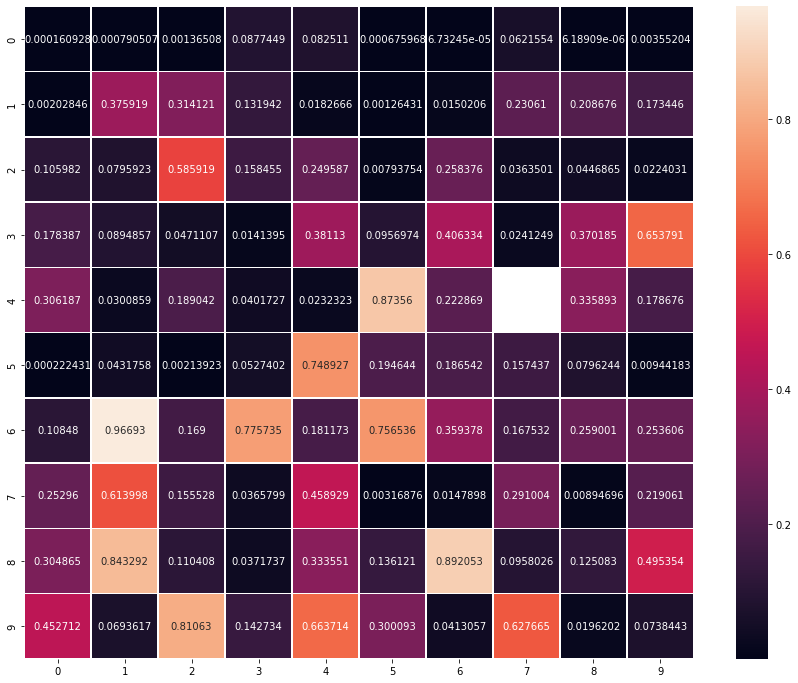

In [128]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(p_value_matrix,annot=True,linewidths=.5, fmt="g",ax = ax);

What is the probability of falsely rejecting the null hypothesis in each cell? What is the probability of falsely rejecting the null hypothesis in at least one of the cells (i.e. what is the **family wise error rate**)?

In other words, given that we made $m$ experiments, with confidence level $\alpha$, what is the probabilty $\mathbb{P}\left(\bigcup_i X_i \le q_{\alpha}\right)$? 

_Note_: you may assume that sampling from different bins are independent.

In [66]:
print("The probability of falsely rejecting the null hypothesis in each cell is alpha: 0.05")
print("The probability of falsely rejecting the null hypothesis in at least one of the cells (FWER):", 1-((1-0.05)**100))

The probability of falsely rejecting the null hypothesis in each cell is alpha: 0.05
The probability of falsely rejecting the null hypothesis in at least one of the cells (FWER): 0.994079470779666


## Bonferroni correction 

One way of assuring that your FWER remains below $\alpha=0.05$ is to apply a <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">**Bonferroni correction**</a>. This means that we set the signficance level of each individual test to $\alpha/m$, where $m=100$ is the number of tests (see, e.g., Wikipedia for an explanation). 

Use a Bonferroni correction on your segmented a/b test and output a $10\times10$ table of boolean values, indicating which test gave a significant result under this correction.

In [67]:
alpha = 0.05
m = 100.0
bon_matrix = np.array(p_value_matrix) < (alpha/m)
bon_matrix

array([[ True, False, False, False, False, False,  True, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

How many of your tests came out significant under this correction?

In [68]:
print("We fail to reject the null hypothesis in all the tests, which means none of them is considered significant")

We fail to reject the null hypothesis in all the tests, which means none of them is considered significant


Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

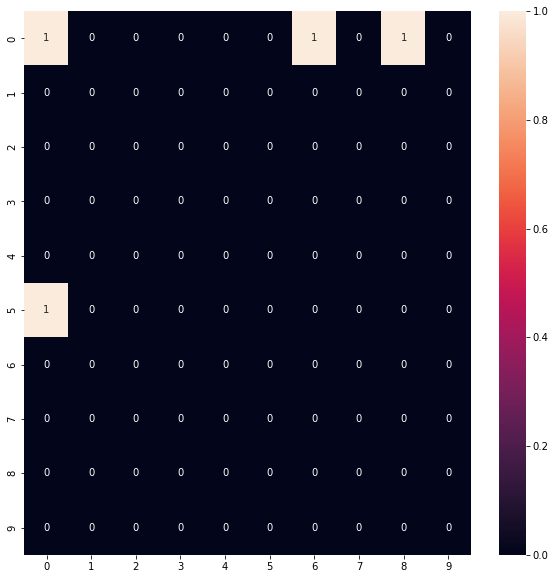

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bon_matrix,annot=True, fmt="g",ax = ax);

## BH correction 

The Bonferroni correction is often criticized for being too restrictive, as you probably noticed in the last subsection. A more commonly used method for correcting $\alpha$ values is the Benjamini-Hochberg method. You can <a href="https://www.youtube.com/watch?v=K8LQSvtjcEo">check out the quest</a> for a nice explanation about it.

Start by arranging the $p$-values of your original test as a series and listing them in ascending order. You can use the `pd.DataFrame.stack` and `pd.Series.sort_values` methods.

In [70]:
p_values_sorted = pd.Series(np.array(p_value_matrix).reshape(100,)).sort_values().values
p_values_sorted

array([6.18909157e-06, 6.73244858e-05, 1.60927914e-04, 2.22430669e-04,
       6.75967768e-04, 7.90507025e-04, 1.26431482e-03, 1.36508222e-03,
       2.02845988e-03, 2.13923218e-03, 3.16876394e-03, 3.55203935e-03,
       7.93753622e-03, 8.94696155e-03, 9.44182859e-03, 1.41394921e-02,
       1.47897656e-02, 1.50205513e-02, 1.82665595e-02, 1.96202097e-02,
       2.24030852e-02, 2.32322993e-02, 2.41249036e-02, 3.00858648e-02,
       3.63500544e-02, 3.65798919e-02, 3.71737055e-02, 4.01727349e-02,
       4.13057415e-02, 4.31758215e-02, 4.46864550e-02, 4.71107198e-02,
       5.27401632e-02, 6.21554235e-02, 6.93617348e-02, 7.38442658e-02,
       7.95923025e-02, 7.96244458e-02, 8.25110355e-02, 8.77448574e-02,
       8.94857274e-02, 9.56973669e-02, 9.58026287e-02, 1.05981785e-01,
       1.08480248e-01, 1.10408245e-01, 1.25082636e-01, 1.31941844e-01,
       1.36121162e-01, 1.42734337e-01, 1.55528262e-01, 1.57437376e-01,
       1.58454871e-01, 1.67531577e-01, 1.69000218e-01, 1.73445872e-01,
      

Plot your sorted $p$-values

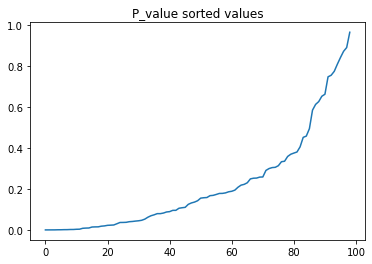

In [71]:
plt.plot(p_values_sorted)
plt.title("P_value sorted values")
plt.show()

For each entry of the new series, compute the value compute the value $\frac{i}{m}\cdot\alpha$, where $i$ is the ordinal place of the entry (i.e. 1,2,...len(series)), $m=100$ and $\alpha=0.05$ as above. Add a plot of these values to your $p$-values plot.

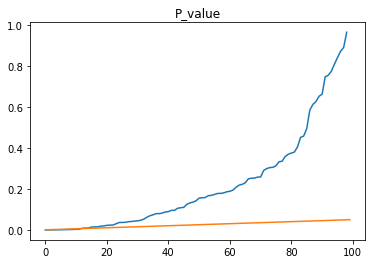

In [72]:
new_series = [((i*alpha)/m) for i in range(1,len(p_values_sorted)+1)]
plt.plot(p_values_sorted)
plt.plot(new_series)
plt.title("P_value")
plt.show()

Find the largest index $i$ for which the $p$-value in the $i$-th place in the series is smaller than $\frac{i}{m}\cdot\alpha$. That is- the last index in the plot you just created where the $p$-values line lies below the _adjusted_-$\alpha$ line.

In [73]:
value = None
alpha = 0.05
m = 100
for i, e1 in enumerate(p_values_sorted):
    if (p_values_sorted[i] < ((i*alpha)/m)):
        value = i
print(value)

11


Reject the null hypothesis for all test before and including this index, and accept it for all others. Reformat your table into a $10\times 10$ dataframe; for which bins did we get a significant result in the corrected test?

In [134]:
bh_test_results = np.zeros(np.array(p_value_matrix).shape)
for i in range(value):
    bh_test_results[p_value_matrix == p_values_sorted[i]] = 1

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

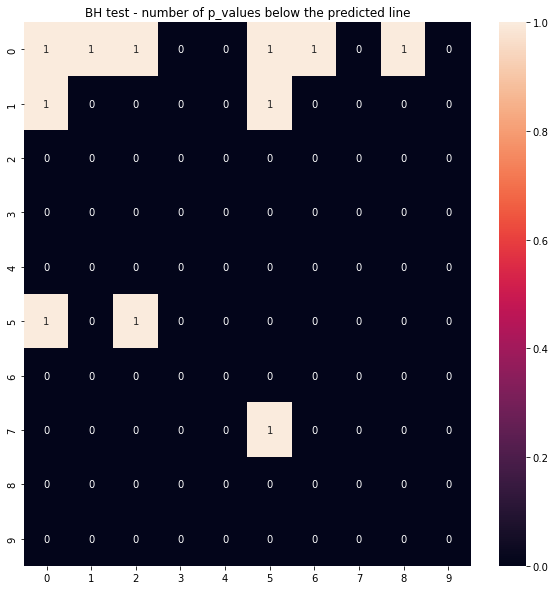

In [135]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bh_test_results,annot=True, fmt="g",ax = ax);
plt.title("BH test - number of p_values below the predicted line");

### Validating your results

You can validate your results (for both corrections) using the <a href= "https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html">`statsmodels.stats.multitest.multipletests`</a> package.

In [76]:
from statsmodels.stats.multitest import multipletests

In [77]:
bon_matrix_test, _ , _ , _ =  multipletests(p_values_sorted, alpha=0.05, method='bonferroni', is_sorted=True, returnsorted=False)

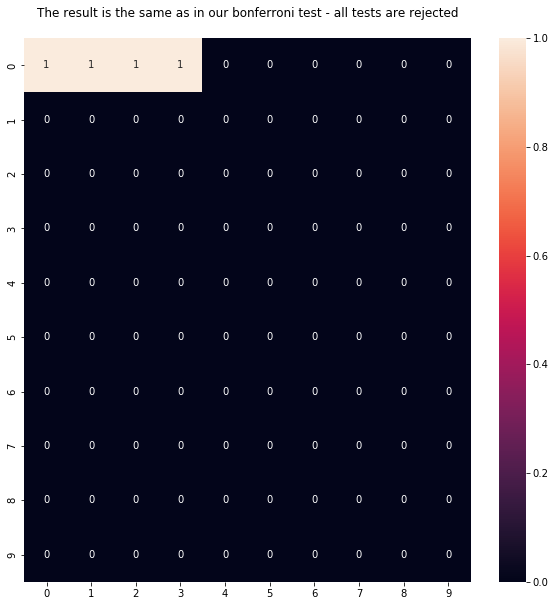

In [83]:
# We got the same results (all false) for the bonefforny correction test.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bon_matrix_test.reshape(10,10),annot=True, fmt="g",ax = ax);
plt.title("The result is the same as in our bonferroni test - all tests are rejected\n");

In [79]:
fdr_bh_matrix_test, _ , _ , _ =  multipletests(p_values_sorted, alpha=0.05, method='fdr_bh', is_sorted=True, returnsorted=True)

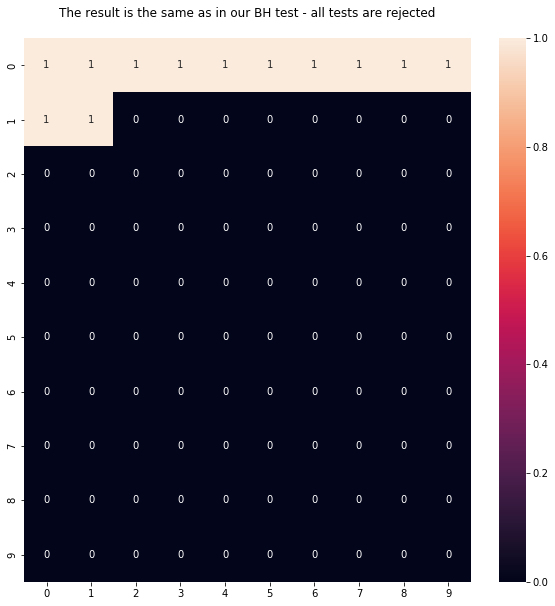

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(fdr_bh_matrix_test.reshape(10,10),annot=True, fmt="g",ax=ax)
plt.title("The result is the same as in our BH test - all tests are rejected\n");